In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import time
import qc
import multiprocessing as mp
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
p = {'batch_size': .1000,
     'n_iterations': 500}

arch = torch.nn.Sequential(
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

In [3]:
mp.set_start_method('spawn')

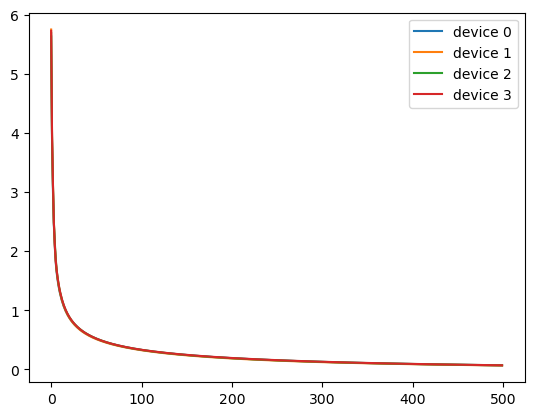

34.41 seconds


In [4]:
if __name__ == "__main__":

    devices = [{'device': torch.device("cuda:0"),
                'arch': arch, 'batch': 0,
                'other_parameters': p},
               {'device': torch.device("cuda:1"), 
                'arch': arch, 'batch': 1,
                'other_parameters': p},
               {'device': torch.device("cuda:2"), 
                'arch': arch, 'batch': 2,
                'other_parameters': p},
               {'device': torch.device("cuda:3"), 
                'arch': arch, 'batch': 3,
                'other_parameters': p}]

    start = time.time()
    p = mp.Pool(processes = 4)
    batches = []
    for i in range(4):
        output = p.map(qc.worker, devices)

    for i in range(4):
        plt.plot(output[i][0], label='device ' + str(i))

    plt.legend()
    plt.show()

    print("{} seconds".format(round(time.time()-start, 2)))

In [5]:
for i in range(4):
    print(output[i][1])

0.2549501657485962
0.28542783856391907
0.290548712015152
0.2723209261894226


In [9]:
correct = 0
y = pd.read_csv('y_test.csv')
for i in range(1000):
    sol = output[0][2][i].cpu().numpy()
    mx = max(range(len(sol)), key=sol.__getitem__)
    correct += y.iloc[i][mx]
print(correct/1000)

0.918
